# Import Library

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns # for nicer plots
import pandas as pd
from glob import glob
import re
from skimage.io import imread
import os
import keras

#Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#Measuring Accuracy
from sklearn.metrics import accuracy_score

%matplotlib inline
np.random.seed(123)         # for reproducibility

Using TensorFlow backend.


# 1) Read the Dataset

In [2]:
digit_train = pd.read_csv('C:/Users/DELL/Desktop/100Days_of_Code/Keras_Course/Kaggle1/train.csv')
digit_test = pd.read_csv('C:/Users/DELL/Desktop/100Days_of_Code/Keras_Course/Kaggle1/test.csv')

digit_train.head()
#digit_test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2) Preprocessing

In [3]:
#Convert Np.array
digit_train = np.array(digit_train)
digit_test = np.array(digit_test)

print(digit_train.shape) 
print(digit_test.shape)   #Test set has no label,so 784 columns

(42000, 785)
(28000, 784)


### 2.1) Feature / Label Split for Train & Test Set

In [4]:
#Train Set (Features/Labels) 

#Features
X = digit_train[:,1:785]
#print("Column of Train Feature is: ", X)
print("Shape of Train Feature is: ", X.shape)

#Label
Y = digit_train[:,0]
#print("Column of Train Label is: ",Y)
print("Shape of Train Label is: ",Y.shape)

Shape of Train Feature is:  (42000, 784)
Shape of Train Label is:  (42000,)


In [5]:
#Test Set

#Features
test_x = digit_test
#print("Column of Test Feature is: ", test_x)
print("Shape of Test Feature is: ", test_x.shape)

#We'll predict the test label

Shape of Test Feature is:  (28000, 784)


### 2.2) Plot the image of dataset

Label = [1 0 1 4 0 0 7 3 5]


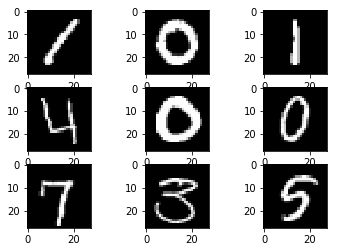

In [6]:
X_visual = X.reshape(X.shape[0], 28, 28)

# Image index, you can pick any number between 0 and length of dataset
img_index = range(0, 9)
# y_train contains the lables, ranging from 0 to 9
label_index = Y[img_index]

print ("Label = " + str(label_index) )

for i in img_index:
    plt.subplot(330 + (i+1))
    # # Show one of the images from the training dataset
    plt.imshow(X_visual[i],cmap='gray')
   

### 2.3) Reshape & Normalization of Input Data

In [7]:
# Reshape the input image into (n_samples,width,height,n_channel)
#input_shape=(img_cols, img_rows, 1)
X = X.reshape(X.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

In [8]:
print(X.shape)
print(Y.shape)
print(test_x.shape)

(42000, 28, 28, 1)
(42000,)
(28000, 28, 28, 1)


In [9]:
#The final preprocessing step for the input data is to convert our data type to float32 
#and normalize our data values to the range [0, 1].

X = X.astype('float32')
test_x = test_x.astype('float32')

X /= 255
test_x /= 255

#Shuffle
X,Y = shuffle(X,Y,random_state=1) 


### 2.4)Train/Validation Split

In [10]:
#Convert dataset into train and test part (20% data as test set)
train_x , valid_x , train_y , valid_y = train_test_split(X,Y,test_size=0.20)

### 2.5) Label Encoding

In [11]:
import tensorflow as tf

# One-hot encode the labels
train_y = tf.keras.utils.to_categorical(train_y, 10)
valid_y = tf.keras.utils.to_categorical(valid_y, 10)

### 2.6) Final Check

In [12]:
#Check the shape

print("train_x: ", train_x.shape)
print("train_y: ", train_y.shape)
print("valid_x: ", valid_x.shape)
print("valid_y: ", valid_y.shape)
print("test_x: ", test_x.shape)

train_x:  (33600, 28, 28, 1)
train_y:  (33600, 10)
valid_x:  (8400, 28, 28, 1)
valid_y:  (8400, 10)
test_x:  (28000, 28, 28, 1)


# 3) Model Training

In [13]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [14]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [15]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [16]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])# Set a learning rate annealer

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86   #86

In [18]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_x)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(train_x,train_y, batch_size=batch_size),
                              epochs = epochs, validation_data = (valid_x,valid_y),
                              verbose = 2, steps_per_epoch=train_x.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30


# 5) Save Model & Submission

In [20]:
# predict results
results = model.predict(test_x)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("C:/Users/DELL/Desktop/100Days_of_Code/Keras_Course/Kaggle1/submit.csv",index=False)